# K-means

## Pacote

### Pacote(s) Convencional(is)

In [1]:
import time as time
import numpy as np
import pandas as pd
import pickle as pkl
# Comentei para poder ser executado também em Sistemas Operacionais Linux:
# import winsound as winsound
import warnings as warnings
warnings.filterwarnings("ignore")

### Pacote(s) Personalizado(s)

In [2]:
import functions.k_means as km
import functions.validacoes_das_variaveis as vv
import functions.k_means as km
import functions.gerar_grafico_elbow_data as ed
import functions.gerar_relatorio_em_planilha as re
import functions.gerar_grafico_dendrograma as de

In [3]:
# tempo_inicio: tempo de início da execução do código (processo)
tempo_inicio = time.time()
# tempo_inicio: tempo de início da execução do código (processo de cálculo, CPU)
tempo_inicio_CPU = time.perf_counter()

## Carregamento, Armazenamento e Manipulação de Dados

### Observações(ões)

   Banco de dados deve estar estruturado da seguinte forma
    
   1. A primeira coluna deve ser de nomeação/identificação das lições;
   2. As colunas seguintes devem ser as variáveis do problema.

### Carregamento 

In [4]:
# endereco = "databases/aeronaves_civis.xlsx"
# endereco = "databases/aeronaves_civis_arbitrado.xlsx"
# endereco = "databases/aeronaves_militares.xlsx"
# endereco = "databases/aeronaves_militares_arbitrado.xlsx"
# endereco = "databases/foguetes.xlsm"
# endereco = "databases/foguetes.xlsx"
# endereco = "databases/quatro_ponto_um.xlsx"
# endereco = "databases/QuatroPontoUm.xlsm"
# endereco = "databases/seis_ponto_um.xlsx"
# endereco = "databases/SeisPontoUm.xlsm"
# endereco = "databases/SetePontoUm.xlsm"
# endereco = "databases/tres_ponto_um.xlsx"
# endereco = "databases/TresPontoUm.xlsm"
# endereco = "databases/turbinas_60_licoes.xlsm"
# endereco = "databases/turbinas_60_licoes.xlsx"
# endereco =  "databases/hubglobe.xlsx"
# endereco =  "databases/hubglobe_10000.xlsx"

endereco = "databases/.injetores_l25.xlsx"

banco_de_dados = pd.read_excel(endereco,
                               sheet_name = 0)

bd_auxiliar = banco_de_dados.copy()

bd_auxiliar.head()

,Número de série,muF oxid,muF comb
0,3,0.000002,0.000001
1,4,0.000002,0.000001
2,16,0.000002,0.000001
3,20,0.000002,0.000001
4,21,0.000002,0.000001


In [5]:
bd_auxiliar.shape

(150, 3)

In [6]:
bd_auxiliar.dtypes

Número de série      int64
muF oxid           float64
muF comb           float64
dtype: object

In [7]:
aplicar_condicoes_pre_definidas = \
    int(input("Deseja aplicar as " 
              "condições pré-definidas? \n\n"
              "0: NÃO; \n"
              "1: Sim. \n\n"
              "Resposta: "))

In [8]:
"""
A primeira coluna é removida, pois trata-se da 
'Nome da Lição' da aeronave.
"""

if aplicar_condicoes_pre_definidas == 0:
    # excluir: variável para indicar a exclusão ou NÃO da primeira coluna
    excluir = int(input("Deseja excluir primeira coluna da tabela indicada na " 
                        "variável <endereco>? \n\n"
                        "0 (zero): NÃO excluir; \n"
                        "1 (um): excluir. \n\n"
                        "Resposta: "))
elif aplicar_condicoes_pre_definidas == 1:
    excluir = 1

if excluir == 1:
    bd_auxiliar = bd_auxiliar.drop(bd_auxiliar.columns[0],
                                   axis = 1)

bd_auxiliar.head()

,Número de série,muF oxid,muF comb
0,3,0.000002,0.000001
1,4,0.000002,0.000001
2,16,0.000002,0.000001
3,20,0.000002,0.000001
4,21,0.000002,0.000001


In [9]:
bd_auxiliar.shape

(150, 3)

## Variável(is)

In [10]:
# sementes: sementes do BIG Data
sementes = bd_auxiliar.values

# n: número total de elementos (linhas)
n = sementes.shape[0]

# num_de_variaveis: número total de variáveis (colunas)
num_de_variaveis = sementes.shape[1]

In [11]:
if aplicar_condicoes_pre_definidas == 0:
    # num_de_k_inicial = Número do k inicial
    num_de_k_inicial = int(input("Digitar o 'Número do k Inicial' = "))
elif aplicar_condicoes_pre_definidas == 1:
    num_de_k_inicial = 2
    
print("Número do k Inicial = " + str(num_de_k_inicial))

Número do k Inicial = 2


In [12]:
if aplicar_condicoes_pre_definidas == 0:
    # K = Número total de clusters
    K = int(input("Digitar o 'Número total de k-clusters K' = "))
elif aplicar_condicoes_pre_definidas == 1:
    K = 15
    
print("Número total de k-clusters K = " + str(K))

Número total de k-clusters K = 4


In [13]:
# Condição para NÃO gerar mais grupos do que elementos
porcentagem = 0.80

if K >= int(porcentagem * n):
    print("Espeficique um valor de "
          "'Número Total de k-clusters K' menor que",
          int(porcentagem * n))
    quit()
    
print("Número total de k-clusters K = " + str(K))

Número total de k-clusters K = 4


In [14]:
if aplicar_condicoes_pre_definidas == 0:
    # num_max_I = Número máximo de iterações
    num_max_I = int(input("Digitar o 'Número total de iterações' = "))
elif aplicar_condicoes_pre_definidas == 1:
    num_max_I = 100
    
print("Número total de iterações = " + str(num_max_I))

Número total de iterações = 1000


In [15]:
if num_de_k_inicial <= 1 or num_de_k_inicial > K:
    print("Espeficique um valor de "
          "'Número do k Inicial' maior ou igual a 2 (dois) "
          "e menor ou igual ao 'Número Total K de k-clusters' "
         "(K = " + str(K) + ").")
    quit()
    
print("Número do k Inicial = " + str(num_de_k_inicial))

Número do k Inicial = 2


In [16]:
if aplicar_condicoes_pre_definidas == 0:
    # titulo_do_eixo_x_do_dendrograma = Título do eixo x do dendrograma
    titulo_do_eixo_x_do_dendrograma = input("Digitar o "
                                            "'Título do Eixo x do "
                                            "Dendrograma': ")

elif aplicar_condicoes_pre_definidas == 1:
    titulo_do_eixo_x_do_dendrograma = "Doadores"
    
print("Título do Eixo x do Dendrograma: " + 
      str(titulo_do_eixo_x_do_dendrograma))

Título do Eixo x do Dendrograma: Injetores


In [17]:
"""
Os objetos são salvos para NÃO ter que
executar todo o código novamente, simplesmente
para executar uma function ou fazer um servidor
ler o arquivo.
"""

# Escrever arquivo:
pkl.dump([num_de_k_inicial,
          K, 
          sementes,
          num_max_I], 
         open("pickles/objetos_k_means.pkl",
              "wb"),
         protocol = 4)

## Cálculo(s)

In [18]:
# os medioides_otimos devem ser um arranjo
medioides_otimos_lista = []
ks_min_otimos_lista = []
WSs_total_otimo_lista = []

for k in range(num_de_k_inicial, K + 1, 1):
    distancias_otimas, medioides_otimos, \
    ks_min_otimos, WS_total_otimo = \
        km.k_means(num_de_k_inicial, k, sementes, num_max_I)
    medioides_otimos_lista.append(medioides_otimos)
    ks_min_otimos_lista.append(ks_min_otimos)
    WSs_total_otimo_lista.append(WS_total_otimo)

    # RESULTADO(S): ---
    print("\n---")
    print("RESULTADO(S) PARA k = " + str(k) + ":")
    print("")

    # print("Medioides ótimos:")
    # print(medioides_otimos_lista)
    # print("")

    # Gerar relatório em planilha:
    endereco = endereco.replace("databases/", "")
    endereco = endereco.replace(".xlsx", "_")
    re.gerar_relatorio_em_planilha(endereco,
                                   banco_de_dados,
                                   distancias_otimas,
                                   ks_min_otimos,
                                   k)

    # print("")
    # print("WS total ótimo:")
    # print(WSs_total_otimo_lista)
    # print("")

    # Gráfico(s):

    # Plotar Dendrograma:
    if n <= 40:
        populacao = n
    else:
        populacao = 40

    # for populacao in range(2, n + 1, 1): Caso se queira executar
    # o programa para gerar is elbow data charts para cada valor
    # de população

    if endereco.endswith("_") == True:
        endereco = endereco[:-1]
    endereco_antigo = endereco
    de.gerar_grafico_dendrograma(endereco,
                                 banco_de_dados,
                                 distancias_otimas,
                                 k,
                                 populacao,
                                 titulo_do_eixo_x_do_dendrograma)
    endereco = endereco_antigo


---
RESULTADO(S) PARA k = 2:

                 Distâncias ótimas normalizadas  Próximo de
Número de série                                            
3                                         1.000         0.0
61                                        0.889         0.0
62                                        0.888         0.0
63                                        0.886         0.0
64                                        0.885         0.0
...                                         ...         ...
128                                       0.825         1.0
127                                       0.826         1.0
126                                       0.826         1.0
134                                       0.824         1.0
190                                       0.840         1.0

[150 rows x 2 columns]

---
RESULTADO(S) PARA k = 3:

                 Distâncias ótimas normalizadas  Próximo de
Número de série                                            
3             

<Figure size 1600x990 with 0 Axes>

<Figure size 1600x990 with 0 Axes>

<Figure size 1600x990 with 0 Axes>

## Resultado(s)

In [19]:
# # Escrever arquivo:
# pkl.dump([endereco,
#           num_de_k_inicial,
#           K,
#           WSs_total_otimo_lista], 
#          open("pickles/objetos_edc.pkl", "wb"),
#         protocol = 4)

In [20]:
endereco

'injetores_l25'

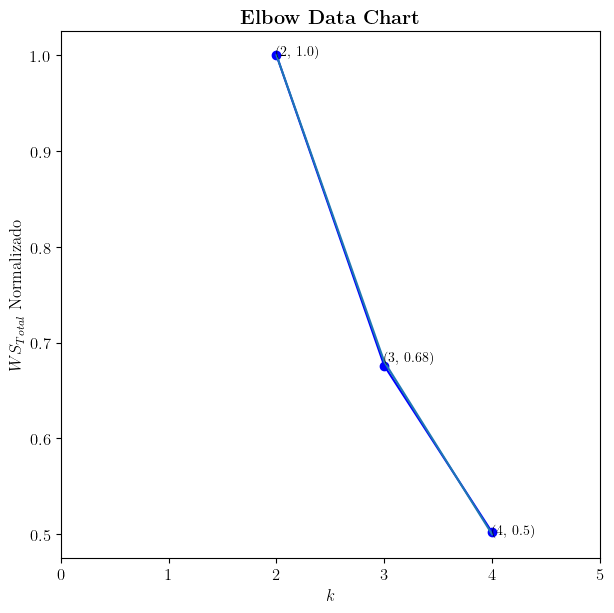

In [21]:
# Plotar o Elbow Data Chart:
ed.gerar_grafico_elbow_data(endereco,
                            num_de_k_inicial,
                            K,
                            WSs_total_otimo_lista)

In [22]:
# Comentei para poder ser executado também em Sistemas Operacionais Linux:
# frequencia = 2500 # (Hertz)
# duracao = 1000 # (ms)
# winsound.Beep(frequencia, duracao)

In [23]:
tempo_fim = time.time() - tempo_inicio
tempo_fim_CPU = time.perf_counter() - tempo_inicio_CPU
print("O tempo de execução da aplicação é = " +
      str(round(tempo_fim, 2)) + " s")

O tempo de execução da aplicação é = 66.24 s
